# Laboratorio 3: Análisis de Datos con Python

## Parte 1: Numpy:
**1. ¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano?**


In [131]:
import numpy as np

In [132]:
arreglo= np.ones(1000, dtype=bool)
tamaño = arreglo.nbytes

print("tamaño en bytes:", tamaño)

tamaño en bytes: 1000


**2. Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente. Muestre los 10 últimos por pantalla.**

In [133]:
arreglo = np.arange(100, 0, -2)
arreglo[-10: ]

array([20, 18, 16, 14, 12, 10,  8,  6,  4,  2])

**3. Dado el array...**


In [134]:
array = np.array([[2,4,5,6],
         [0,3,7,4],
         [8,8,5,2],
         [1,5,6,1]])

In [135]:
# todos los elementos de la fila 1
array[1,:]

array([0, 3, 7, 4])

In [136]:
#primer y segundo subarray
array[::2, 0:3:2]

array([[2, 5],
       [8, 5]])

**4. Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9],obtenga la media aritmética de la diferencia (a-b).**

In [137]:
a = np.array([1, 4, 2, 7])
b = np.array([1, 3, 2, 9])

In [138]:
diferencia = np.subtract(a,b)
diferencia

array([ 0,  1,  0, -2])

In [139]:
print(f'Media aritmetica de la diferencia a-b = {np.mean(diferencia)}')

Media aritmetica de la diferencia a-b = -0.25


**5. Tengo valores de cordenadas (x, y) en las columnas del array
    1.33 4.5
    30.0 10.7
    70.2 0.5**

   **Agregue a este array las coordenadas (37.1, -3.6). Muestre en pantalla las dimensiones del nuevo array.**

In [140]:
coordenadas = np.array([[1.33, 4.5], [30.0, 10.7], [70.2, 0.5]])
coordenadas

array([[ 1.33,  4.5 ],
       [30.  , 10.7 ],
       [70.2 ,  0.5 ]])

In [141]:
coordenadas.ndim

2

In [142]:
a = np.array([37.1, -3.6])
a

array([37.1, -3.6])

In [143]:
combinacion = np.vstack((coordenadas, a))
combinacion

array([[ 1.33,  4.5 ],
       [30.  , 10.7 ],
       [70.2 ,  0.5 ],
       [37.1 , -3.6 ]])

**6. Copie el array del ejercicio anterior. Traspóngalo (.Agregue ahora dos nuevos pares de coordenadas: (10.8,3.0) y (35.8, 12.0).**

In [144]:
trans = coordenadas.T
trans

array([[ 1.33, 30.  , 70.2 ],
       [ 4.5 , 10.7 ,  0.5 ]])

In [145]:
nuevo = np.array([[10.8,3.0], [35.8, 12.0]])
nuevo.T

array([[10.8, 35.8],
       [ 3. , 12. ]])

In [146]:
np.column_stack((trans,nuevo.T))

array([[ 1.33, 30.  , 70.2 , 10.8 , 35.8 ],
       [ 4.5 , 10.7 ,  0.5 ,  3.  , 12.  ]])

## Parte 2: Exploración y Minería de Datos:

Con el dataset nucleospoblacion.csv adjunto al laboratorio, luego responda las siguientes preguntas usando pandas y matplotlib.

**1. ¿Cuántos Municipios tienen más de 100000 habitantes?.**

In [147]:
import pandas as pd
dataframe = pd.read_csv('NucleosPoblacion.csv')
dataframe

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873
...,...,...,...,...,...,...,...,...,...,...
847,847,848,Infante Juan Manuel,14192.0,30030,Murcia,30,Murcia,-1.124304,37.979033
848,848,849,Santa Maria de Gracia,13349.0,30030,Murcia,30,Murcia,-1.202069,37.984024
849,849,850,Vista Alegre,15208.0,30030,Murcia,30,Murcia,-1.130564,37.995715
850,850,851,Poligono Sta M de Benquerencia,19177.0,45168,Toledo,45,Toledo,-3.948364,39.866699


In [148]:
muni = (dataframe['Poblacion'] > 100000).sum()
muni
#62 municipios

62

**2. Realice una gráfica de barras sobre la polbación de cada ciudad, ordenela de menor a mayo y responda:**

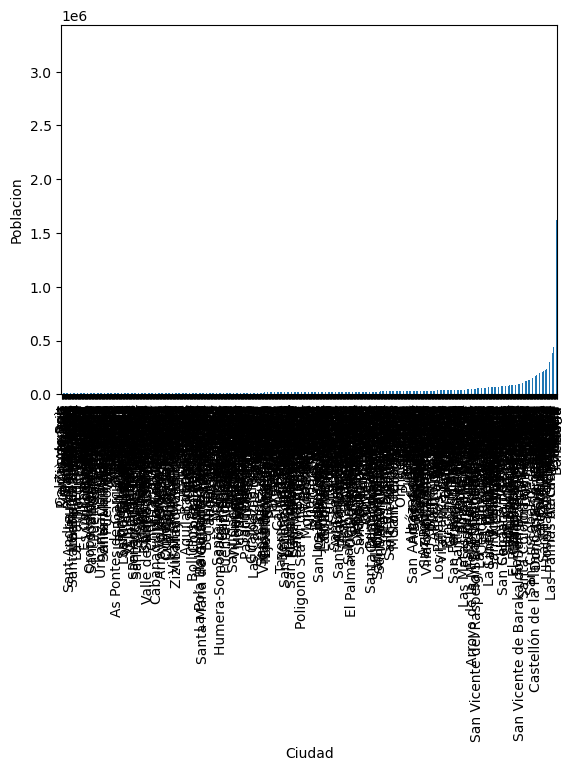

In [149]:
import matplotlib.pyplot as plt

pob_mun =dataframe.groupby('Texto')['Poblacion'].sum().reset_index()
pob_mun = pob_mun.sort_values(by='Poblacion', ascending=True)
grafico = pob_mun.plot(kind='bar', x='Texto', y='Poblacion', legend=None)

# Añadir etiquetas al gráfico
grafico.set_xlabel('Ciudad')
grafico.set_ylabel('Poblacion')

# Mostrar el gráfico
plt.show()

**a. ¿Cuál es la segunda ciudad más poblada?**

In [151]:
pob_mun

,Texto,Poblacion
840,Zumarraga,10037.0
160,Caldas de Reis,10045.0
61,Amurrio,10050.0
579,Premià de Dalt,10064.0
149,Buñol,10077.0
...,...,...
837,Zaragoza,675121.0
713,Sevilla,704198.0
784,Valencia,809267.0
111,Barcelona,1619337.0


La segunda ciudad mas poblada es **Barcelona**

**b. ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?**

In [152]:
pob_mun =dataframe.groupby('Provincia')['Poblacion'].sum().reset_index()

pob_mun = pob_mun.sort_values(by='Poblacion', ascending=False)
pos_granada = (pob_mun.index[pob_mun['Provincia'] == 'Granada'][0]) + 1
pos_granada

18

Ocupa el puesto **18**

**3. ¿Cuántos municipios de Extremadura tienen más de 5000 habitantes?.**

In [153]:
dataframe[dataframe['Provincia']=='Extremadura']

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y


No se encontró "Extremadura" en ninguna columna

**4. ¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados). Proporcione también la provincia a la que pertenece y su población.**

In [154]:
norte = dataframe.loc[dataframe['Y'].idxmax()]

print("El municipio situado más al norte es:", norte['Municipio'])
print("Provincia:", norte['Provincia'])
print("Población:", norte['Poblacion'])

El municipio situado más al norte es: Viveiro
Provincia: Lugo
Población: 16211.0


**5. Obtenga la media, mediana, desviación estándar, valormáximo y valor mínimo de la población de los municipiosde la provincia de Granada.**

In [155]:
granada = dataframe.loc[dataframe['Provincia']== 'Granada']
granada

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
266,266,267,Albolote,17637.0,18003,Albolote,18,Granada,-3.657480,37.230902
267,267,268,Almuñécar,27703.0,18017,Almuñécar,18,Granada,-3.690916,36.734414
268,268,269,Armilla,21895.0,18021,Armilla,18,Granada,-3.626903,37.140314
269,269,270,Atarfe,15945.0,18022,Atarfe,18,Granada,-3.688734,37.222711
270,270,271,Baza,21982.0,18023,Baza,18,Granada,-2.774856,37.490778
271,271,272,Churriana de la Vega,12448.0,18062,Churriana de la Vega,18,Granada,-3.645813,37.148857
272,272,273,Granada,239154.0,18087,Granada,18,Granada,-3.600019,37.176419
273,273,274,Guadix,20407.0,18089,Guadix,18,Granada,-3.136381,37.301611
274,274,275,Huétor Vega,11551.0,18101,Huétor Vega,18,Granada,-3.571741,37.144613
275,275,276,Illora,10386.0,18102,Illora,18,Granada,-3.881723,37.286115


In [156]:
media = granada['Poblacion'].mean()
mediana =  granada['Poblacion'].median()
des_est =  granada['Poblacion'].std()
max_val = granada['Poblacion'].max()
min_val = granada['Poblacion'].min()

print(f'La media es de :{media}')
print(f'La mediana es de :{mediana}')
print(f'La desviación estandar es de:{des_est}')
print(f'La menor poblacion es de :{min_val}')
print(f'La mayor poblacion es de :{max_val}')

La media es de :30217.85
La mediana es de :17526.0
La desviación estandar es de:50355.49171459277
La menor poblacion es de :10386.0
La mayor poblacion es de :239154.0


**6. Realice un histograma con la población de los Municipios para cada una de las provincias.**

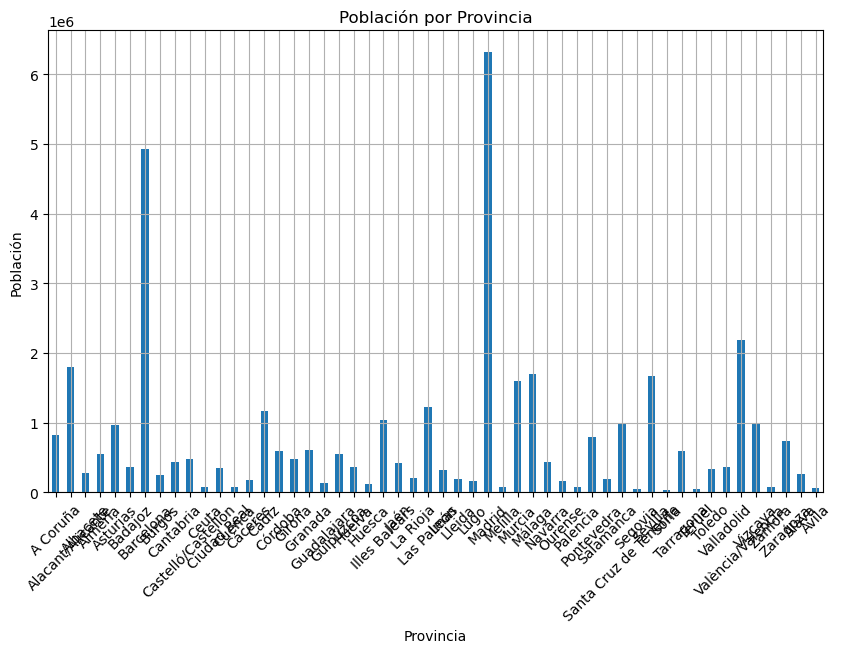

In [171]:
pob_prov =dataframe.groupby('Provincia')['Poblacion'].sum()

plt.figure(figsize=(10, 6))
pob_prov.plot(kind='bar')
plt.title('Población por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Población')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [172]:
!git init

Initialized empty Git repository in C:/Users/Alienware M15/Universidad/Laboratorio3/.git/


In [ ]:
!git remote add origin https://github.com/ElMangel/Proyecto-1--Regresi-n-con-c-digo.git
!git add Proyecto_19000522.ipynb
!git commit -m "Terminando el calculo del error"
!git push --set-upstream origin master